##  Diabetes Risk Stratification - Demographic with SIM

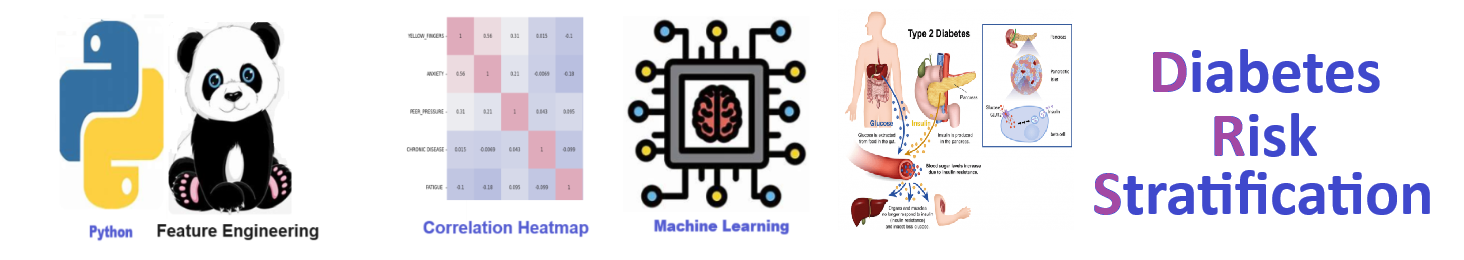

In [1]:
import pandas as pd #Pandas is high performance data manipulation 
import matplotlib.pyplot as plt   # matplot is for python graphics
import numpy as np   #numpy is for array processing
import seaborn  as sns
import story_board as sb
import os
import schedule
from datetime import datetime
import time

In [2]:
## Optional Step 0 - Intitiate Configuration Settings and name the overall solution
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  
solution_name = 'diabetes_risk_stratification'

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process diabetes_risk_stratification Step 0 - Initializing and starting Logging Process.


# Import the data set 

In [4]:
definition ='''

## 🧠 Overview of Diabetes  
*(Source: WebMD)*  

### ⚙️ What Is Diabetes?  
Diabetes refers to a group of metabolic disorders characterized by problems with the hormone **insulin**, resulting in elevated blood glucose levels. While diabetes cannot be cured, it can be effectively managed through lifestyle modification, medication, and regular monitoring.

### 🧬 Major Types of Diabetes  
There are three primary types of diabetes:  
1. **Type 1 Diabetes** – An autoimmune condition where the pancreas produces little or no insulin.  
2. **Type 2 Diabetes** – The most common form, often associated with insulin resistance and lifestyle factors.  
3. **Gestational Diabetes** – Occurs during pregnancy and typically resolves after delivery, though it increases the risk of type 2 diabetes later in life.

### 🩸 What Is Diabetes Insipidus?  
**Diabetes insipidus** is a distinct condition unrelated to blood glucose regulation. It is caused by a problem with antidiuretic hormone (ADH), leading to excessive thirst and the production of large amounts of diluted urine.

### 💉 What Is Gestational Diabetes Insipidus?  
**Gestational diabetes insipidus** (also called **gestagenic diabetes insipidus**) is a rare disorder that may develop during the **third trimester of pregnancy**. It is typically transient and resolves after childbirth.

'''

sb.start_story(definition)



## 🧠 Overview of Diabetes  
*(Source: WebMD)*  

### ⚙️ What Is Diabetes?  
Diabetes refers to a group of metabolic disorders characterized by problems with the hormone **insulin**, resulting in elevated blood glucose levels. While diabetes cannot be cured, it can be effectively managed through lifestyle modification, medication, and regular monitoring.

### 🧬 Major Types of Diabetes  
There are three primary types of diabetes:  
1. **Type 1 Diabetes** – An autoimmune condition where the pancreas produces little or no insulin.  
2. **Type 2 Diabetes** – The most common form, often associated with insulin resistance and lifestyle factors.  
3. **Gestational Diabetes** – Occurs during pregnancy and typically resolves after delivery, though it increases the risk of type 2 diabetes later in life.

### 🩸 What Is Diabetes Insipidus?  
**Diabetes insipidus** is a distinct condition unrelated to blood glucose regulation. It is caused by a problem with antidiuretic hormone (ADH), leading to excessive thirst and the production of large amounts of diluted urine.

### 💉 What Is Gestational Diabetes Insipidus?  
**Gestational diabetes insipidus** (also called **gestagenic diabetes insipidus**) is a rare disorder that may develop during the **third trimester of pregnancy**. It is typically transient and resolves after childbirth.



In [5]:
sb.add_image("diabetes_risk_stratification.png.png")

![Image](diabetes_risk_stratification.png.png)



In [6]:
definition ='''
# ⚙️ Importing the PIMA Indians Diabetes Dataset  
*(Source: [Kaggle.com](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database))*  

The **Pima Indians Diabetes Dataset** originates from the *National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)* and is hosted and curated on Kaggle for research and educational use.  

This dataset is commonly used to explore and model the prediction of **diabetes diagnosis** based on physiological and medical features.  

> ⚠️ **Note:** This dataset represents a small, specific sub-population of adult females (aged 21+) of **Pima Indian heritage**. It is not representative of broader, real-world diabetic populations and should be used **for learning and demonstration purposes only**.  

---

## 📈 Dataset Overview  

The dataset contains health examination records of Pima Indian women, including variables such as glucose level, blood pressure, insulin level, and body mass index (BMI).  
Each observation is labeled to indicate whether the individual shows signs of diabetes.  

---

## 🧩 Attribute Reference and Normal Ranges  

| Variable | Description | Normal / Reference Ranges |
|-----------|--------------|---------------------------|
| **Glucose** | Plasma glucose concentration (mg/dL) | <140 = Normal • 140–200 = Prediabetic • >200 = Diabetic |
| **BloodPressure** | Diastolic blood pressure (mm Hg) | <60 = Low • 60–80 = Normal • 80–90 = Stage 1 HTN • 90–120 = Stage 2 HTN • >120 = Crisis |
| **SkinThickness** | Triceps skinfold thickness (mm) | <10 = Low • 10–30 = Normal • >30 = Above Normal |
| **Insulin** | 2-Hour serum insulin (µU/mL) | <200 = Normal • >200 = Elevated |
| **BMI** | Body mass index (kg/m²) | <18.5 = Underweight • 18.5–25 = Normal • 25–30 = Overweight • >30 = Obese |

---

## 🧠 Purpose  

This dataset is frequently used for:  
- Building and validating **classification models** (e.g., logistic regression, decision trees, neural networks).  
- Demonstrating **data preprocessing, feature engineering, and model evaluation** techniques.  
- Teaching **statistical concepts** in health analytics and population health.  

'''

sb.outmd(definition)



# ⚙️ Importing the PIMA Indians Diabetes Dataset  
*(Source: [Kaggle.com](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database))*  

The **Pima Indians Diabetes Dataset** originates from the *National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)* and is hosted and curated on Kaggle for research and educational use.  

This dataset is commonly used to explore and model the prediction of **diabetes diagnosis** based on physiological and medical features.  

> ⚠️ **Note:** This dataset represents a small, specific sub-population of adult females (aged 21+) of **Pima Indian heritage**. It is not representative of broader, real-world diabetic populations and should be used **for learning and demonstration purposes only**.  

---

## 📈 Dataset Overview  

The dataset contains health examination records of Pima Indian women, including variables such as glucose level, blood pressure, insulin level, and body mass index (BMI).  
Each observation is labeled to indicate whether the individual shows signs of diabetes.  

---

## 🧩 Attribute Reference and Normal Ranges  

| Variable | Description | Normal / Reference Ranges |
|-----------|--------------|---------------------------|
| **Glucose** | Plasma glucose concentration (mg/dL) | <140 = Normal • 140–200 = Prediabetic • >200 = Diabetic |
| **BloodPressure** | Diastolic blood pressure (mm Hg) | <60 = Low • 60–80 = Normal • 80–90 = Stage 1 HTN • 90–120 = Stage 2 HTN • >120 = Crisis |
| **SkinThickness** | Triceps skinfold thickness (mm) | <10 = Low • 10–30 = Normal • >30 = Above Normal |
| **Insulin** | 2-Hour serum insulin (µU/mL) | <200 = Normal • >200 = Elevated |
| **BMI** | Body mass index (kg/m²) | <18.5 = Underweight • 18.5–25 = Normal • 25–30 = Overweight • >30 = Obese |

---

## 🧠 Purpose  

This dataset is frequently used for:  
- Building and validating **classification models** (e.g., logistic regression, decision trees, neural networks).  
- Demonstrating **data preprocessing, feature engineering, and model evaluation** techniques.  
- Teaching **statistical concepts** in health analytics and population health.  



In [7]:
# dataset = pd.read_csv("C:/Documents/datasets/diabetes.csv")
df_study_dataset = pd.read_csv("diabetes.csv")
df_diabetes = df_study_dataset
print(f"The dataset contains {df_study_dataset.shape[0]} rows and {df_study_dataset.shape[1]} columns of data ") 

The dataset contains 768 rows and 9 columns of data 


# Examine the data set - Descriptive Statistics

In [8]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
def list_columns_markdown(df, title="📋 Columns in the Dataset"):
    """
    Generate a markdown-formatted list of columns in any DataFrame.
    """
    if df is None or df.empty:
        return f"⚠️ No data available to describe."
    
    # Format column list as Markdown bullets
    col_list = "\n- ".join(df.columns.astype(str))
    
    # Return Markdown block
    md = f"""
## {title}

Total Columns: **{len(df.columns)}**

- {col_list}
"""
    return md

In [10]:
definition = f"""

## ⚙️ Descriptive Statitistics for the dataset

{df_diabetes.describe().to_markdown()}

## 📈 Shape of the dataset

**Rows:** {df_diabetes.shape[0]}  
**Columns:** {df_diabetes.shape[1]}

{list_columns_markdown(df_diabetes)}

## 📈 Sample - Top 5 Rows (HEAD) 

{df_diabetes.head().to_markdown()}


"""
sb.outmd(definition)





## ⚙️ Descriptive Statitistics for the dataset

|       |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |       BMI |   DiabetesPedigreeFunction |      Age |    Outcome |
|:------|--------------:|----------:|----------------:|----------------:|----------:|----------:|---------------------------:|---------:|-----------:|
| count |     768       |  768      |        768      |        768      |  768      | 768       |                 768        | 768      | 768        |
| mean  |       3.84505 |  120.895  |         69.1055 |         20.5365 |   79.7995 |  31.9926  |                   0.471876 |  33.2409 |   0.348958 |
| std   |       3.36958 |   31.9726 |         19.3558 |         15.9522 |  115.244  |   7.88416 |                   0.331329 |  11.7602 |   0.476951 |
| min   |       0       |    0      |          0      |          0      |    0      |   0       |                   0.078    |  21      |   0        |
| 25%   |       1       |   99      |         62      |          0      |    0      |  27.3     |                   0.24375  |  24      |   0        |
| 50%   |       3       |  117      |         72      |         23      |   30.5    |  32       |                   0.3725   |  29      |   0        |
| 75%   |       6       |  140.25   |         80      |         32      |  127.25   |  36.6     |                   0.62625  |  41      |   1        |
| max   |      17       |  199      |        122      |         99      |  846      |  67.1     |                   2.42     |  81      |   1        |

## 📈 Shape of the dataset

**Rows:** 768  
**Columns:** 9


## 📋 Columns in the Dataset

Total Columns: **9**

- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome


## 📈 Sample - Top 5 Rows (HEAD) 

|    |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age |   Outcome |
|---:|--------------:|----------:|----------------:|----------------:|----------:|------:|---------------------------:|------:|----------:|
|  0 |             6 |       148 |              72 |              35 |         0 |  33.6 |                      0.627 |    50 |         1 |
|  1 |             1 |        85 |              66 |              29 |         0 |  26.6 |                      0.351 |    31 |         0 |
|  2 |             8 |       183 |              64 |               0 |         0 |  23.3 |                      0.672 |    32 |         1 |
|  3 |             1 |        89 |              66 |              23 |        94 |  28.1 |                      0.167 |    21 |         0 |
|  4 |             0 |       137 |              40 |              35 |       168 |  43.1 |                      2.288 |    33 |         1 |




In [11]:
df_diabetes.head(5)   #provides top 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df_diabetes.shape #print the shape of the matrix

(768, 9)

In [13]:
df_diabetes.isnull().values.any()  # determine if any of the dataset is null

False

# Establish a correlation Matrix 

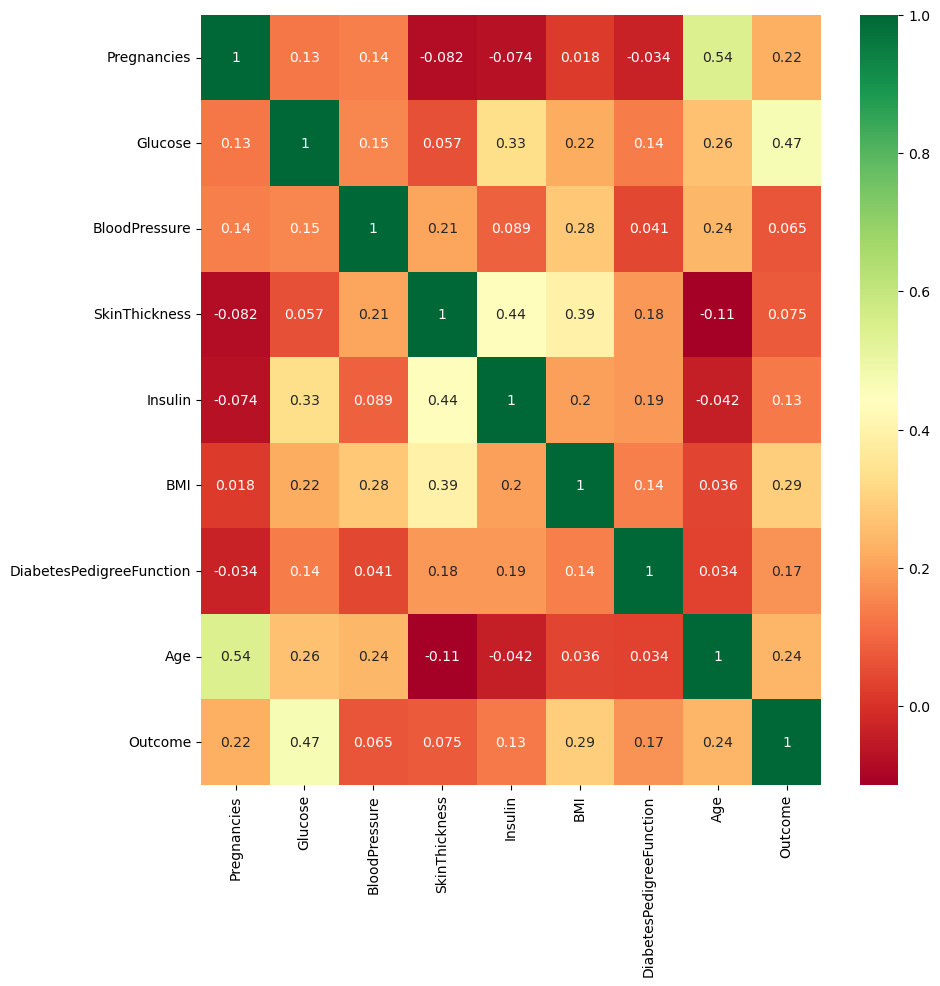

In [14]:
correlation_matrix = df_diabetes.corr()     #establish a correlation matrix for all fields
top_correlation_features = correlation_matrix.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df_diabetes[top_correlation_features].corr(),annot=True,cmap="RdYlGn")


In [15]:
df_diabetes.corr(numeric_only=True).round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


In [16]:
diabetes_map = {True: 1, False: 0}
df_diabetes['Diabetes'] = df_diabetes['Outcome'].map(diabetes_map)
df_diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN


In [17]:
diabetes_true_count = (df_diabetes['Outcome'] == 1).sum()
diabetes_false_count = (df_diabetes['Outcome'] == 0).sum()
(diabetes_true_count, diabetes_false_count)
print(f"There are {df_diabetes.shape[0]} rows of data, {diabetes_true_count} have diabetes, and {diabetes_false_count} do not.")

There are 768 rows of data, 268 have diabetes, and 500 do not.


In [18]:
## Train Test Split
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness']
predicted_class = ['Outcome']

In [19]:
X = df_diabetes[feature_columns].values
y = df_diabetes[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [20]:
print("total number of rows : {0}".format(len(df_diabetes)))
print("number of rows missing Glucose: {0}".format(len(df_diabetes.loc[df_diabetes['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df_diabetes.loc[df_diabetes['BloodPressure'] == 0])))
print("number of rows missing Insulin: {0}".format(len(df_diabetes.loc[df_diabetes['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(df_diabetes.loc[df_diabetes['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df_diabetes.loc[df_diabetes['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(df_diabetes.loc[df_diabetes['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df_diabetes.loc[df_diabetes['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing SkinThickness: 227


In [21]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [22]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [23]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, # min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

RandomForestClassifier(max_features='auto', n_estimators=10, random_state=10)

In [24]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Random Forest Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Random Forest Accuracy = 0.736


In [25]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [26]:
import story_board as sb
definition ='''
## Explanation of Each Model 

1. **Logistic Regression**: A linear model used for binary classification that estimates the probability of a sample belonging to a particular class.

2. **Decision Tree**: A tree-like model that splits the data into subsets based on the value of input features, making decisions based on feature values to classify instances.

3. **K-Nearest Neighbor (KNN)**: A non-parametric method used for classification by finding the 'k' nearest data points in the feature space and assigning the most common class among them to the query point.

4. **Gaussian Naive Bayes**: A probabilistic classifier based on Bayes' theorem with the assumption of independence among features, often used for text classification tasks.

5. **Multinomial Naive Bayes**: Similar to Gaussian Naive Bayes but specifically designed for classification tasks with discrete features, such as word counts in text classification.

6. **Support Vector Classifier (SVC)**: A supervised learning algorithm that finds the hyperplane that best separates classes in a high-dimensional space, often used for binary classification.

7. **Random Forest**: An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

8. **XGBoost**: An optimized gradient boosting library that implements machine learning algorithms under the Gradient Boosting framework, known for its speed and performance in handling large datasets.

9. **Multi-layer Perceptron (MLP)**: A type of artificial neural network composed of multiple layers of nodes (neurons) that can learn non-linear relationships between input and output data.

10. **Gradient Boosting Classifier**: A machine learning technique that builds an ensemble of weak learners (typically decision trees) in a sequential manner, with each tree correcting the errors of its predecessors, resulting in a strong predictive model.

'''

sb.outmd(definition)


## Explanation of Each Model 

1. **Logistic Regression**: A linear model used for binary classification that estimates the probability of a sample belonging to a particular class.

2. **Decision Tree**: A tree-like model that splits the data into subsets based on the value of input features, making decisions based on feature values to classify instances.

3. **K-Nearest Neighbor (KNN)**: A non-parametric method used for classification by finding the 'k' nearest data points in the feature space and assigning the most common class among them to the query point.

4. **Gaussian Naive Bayes**: A probabilistic classifier based on Bayes' theorem with the assumption of independence among features, often used for text classification tasks.

5. **Multinomial Naive Bayes**: Similar to Gaussian Naive Bayes but specifically designed for classification tasks with discrete features, such as word counts in text classification.

6. **Support Vector Classifier (SVC)**: A supervised learning algorithm that finds the hyperplane that best separates classes in a high-dimensional space, often used for binary classification.

7. **Random Forest**: An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees.

8. **XGBoost**: An optimized gradient boosting library that implements machine learning algorithms under the Gradient Boosting framework, known for its speed and performance in handling large datasets.

9. **Multi-layer Perceptron (MLP)**: A type of artificial neural network composed of multiple layers of nodes (neurons) that can learn non-linear relationships between input and output data.

10. **Gradient Boosting Classifier**: A machine learning technique that builds an ensemble of weak learners (typically decision trees) in a sequential manner, with each tree correcting the errors of its predecessors, resulting in a strong predictive model.



In [27]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [28]:
classifier=xgboost.XGBClassifier()



In [29]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [30]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [31]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 4.06 seconds.


In [32]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [34]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

C:\Users\josep\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "silent" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\josep\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\josep\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 143, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\josep\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\josep\anaconda3\Lib\site-packages\sklearn\base.py", line 764, i

In [35]:
score

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [36]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

TypeError: unsupported operand type(s) for -: 'float' and 'datetime.datetime'